# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
#units = "metric"
# query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data_df = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data_df.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | puerto baquerizo moreno
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | igarka
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | nuuk
Processing Record 11 of Set 1 | kemise
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bailesti
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | tidjikja
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | fort mcmurray
Processing Record 19 of Set 1 | nar'yan-mar
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | grytviken
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data_df)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,28.98,88,87,4.02,EC,1699900781
1,touros,-5.1989,-35.4608,28.94,63,18,5.82,BR,1699900781
2,ilulissat,69.2167,-51.1000,-4.99,58,75,8.23,GL,1699900782
3,mount gambier,-37.8333,140.7667,11.02,82,100,1.57,AU,1699900540
4,puerto baquerizo moreno,-0.9000,-89.6000,29.55,58,40,6.17,EC,1699900782


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,88,87,4.02,EC,1699900781
1,touros,-5.1989,-35.4608,28.94,63,18,5.82,BR,1699900781
2,ilulissat,69.2167,-51.1000,-4.99,58,75,8.23,GL,1699900782
3,mount gambier,-37.8333,140.7667,11.02,82,100,1.57,AU,1699900540
4,puerto baquerizo moreno,-0.9000,-89.6000,29.55,58,40,6.17,EC,1699900782


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

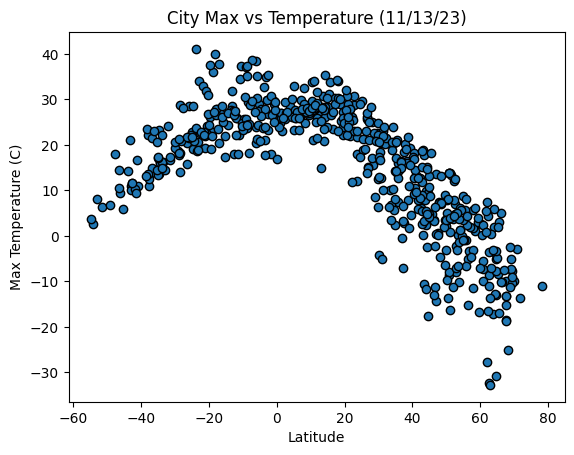

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black",linewidth=1, marker="o")

# Incorporate the other graph properties
plt.title("City Max vs Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

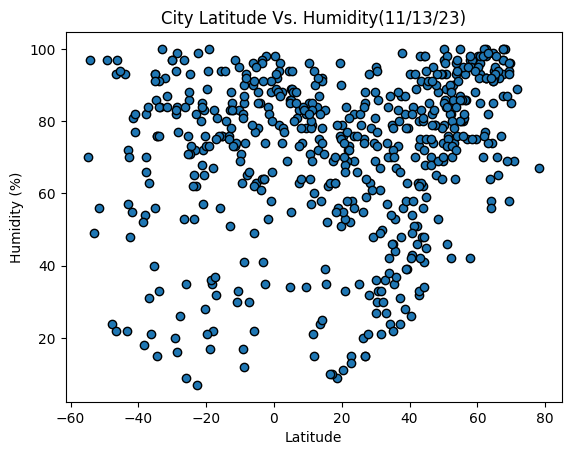

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

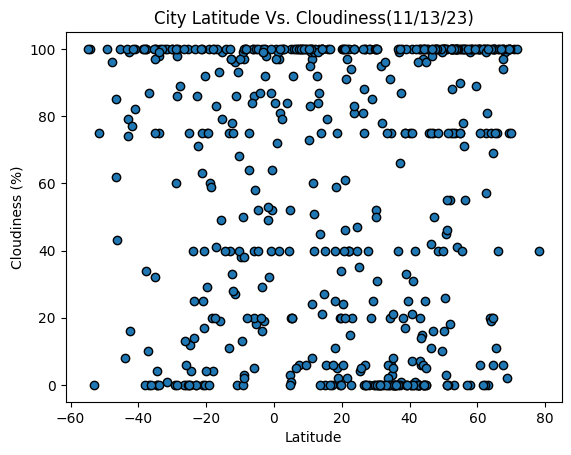

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

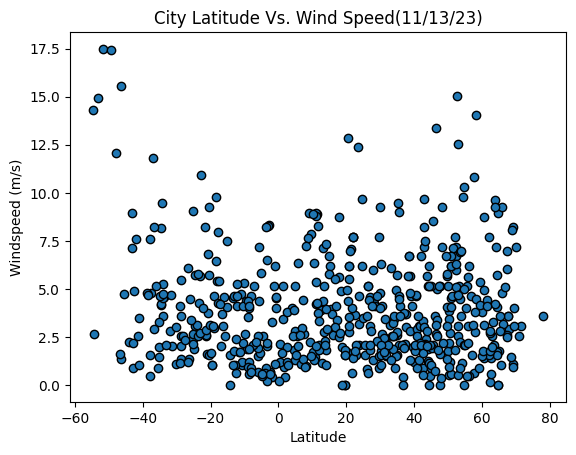

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
     # Create the scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Label the axes and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ilulissat,69.2167,-51.1000,-4.99,58,75,8.23,GL,1699900782
6,bilibino,68.0546,166.4372,-25.18,100,99,2.90,RU,1699900782
7,igarka,67.4667,86.5833,-9.99,93,100,6.06,RU,1699900782
9,nuuk,64.1835,-51.7216,-3.66,74,20,7.20,GL,1699900782
10,kemise,10.7167,39.8667,21.03,64,83,1.44,ET,1699900783


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,88,87,4.02,EC,1699900781
1,touros,-5.1989,-35.4608,28.94,63,18,5.82,BR,1699900781
3,mount gambier,-37.8333,140.7667,11.02,82,100,1.57,AU,1699900540
4,puerto baquerizo moreno,-0.9000,-89.6000,29.55,58,40,6.17,EC,1699900782
5,adamstown,-25.0660,-130.1015,22.92,86,75,9.05,PN,1699900782


###  Temperature vs. Latitude Linear Regression Plot

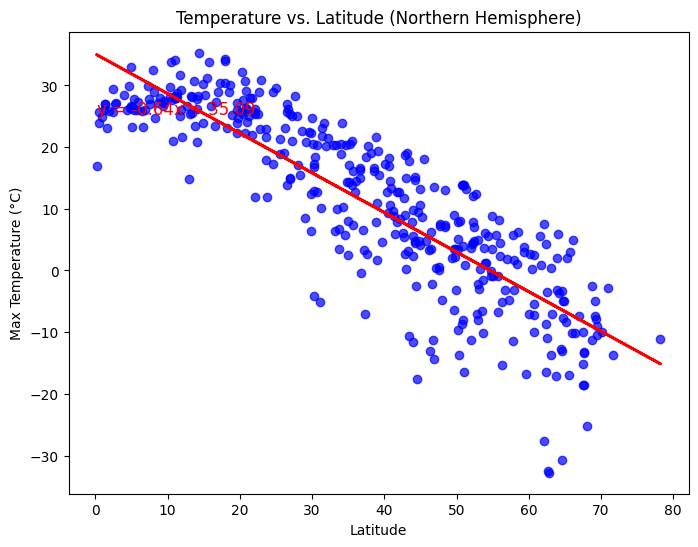

The r-value is: -0.8613560348425658


In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Temperature vs. Latitude (Northern Hemisphere)")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

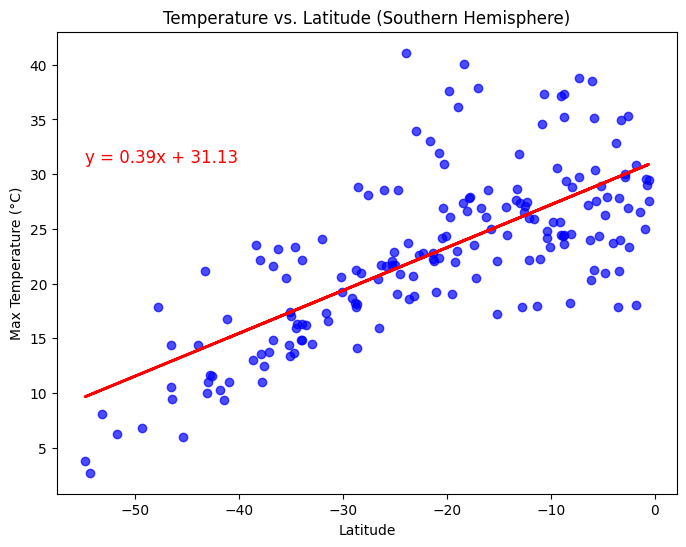

The r-value is: 0.7179062172493289


In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Temperature vs. Latitude (Southern Hemisphere)")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In summary, the linear regression plots for temperature vs. latitude in both the Northern and Southern Hemispheres reveal strong, clear, and opposite linear relationships. These relationships are in line with the expected climatic patterns on Earth, where temperatures tend to be colder at higher latitudes in the Northern Hemisphere and warmer at higher latitudes in the Southern Hemisphere. The r-values being close to -1 and 1 for the Northern and Southern Hemispheres, reflect the strength of these relationships.

### Humidity vs. Latitude Linear Regression Plot

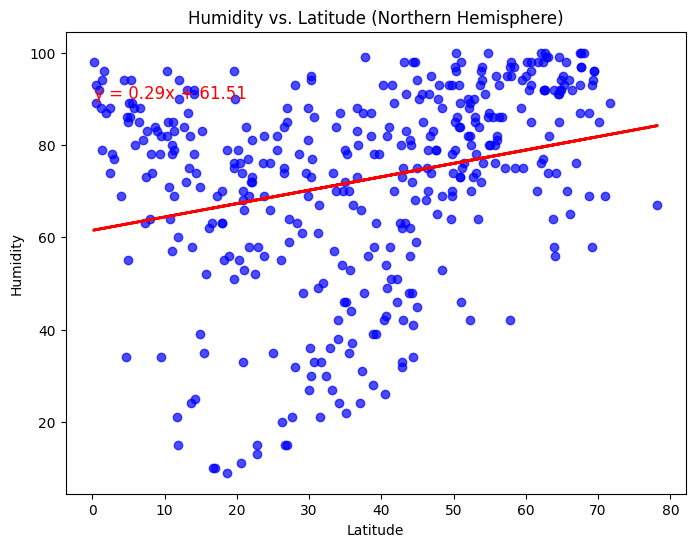

The r-value is: 0.26136441389519294


In [27]:
# Northern Hemisphere

# Assuming you have a DataFrame named city_data_df with columns "Lat" and "Humidity"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (Northern Hemisphere)")

# Show the plot

plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

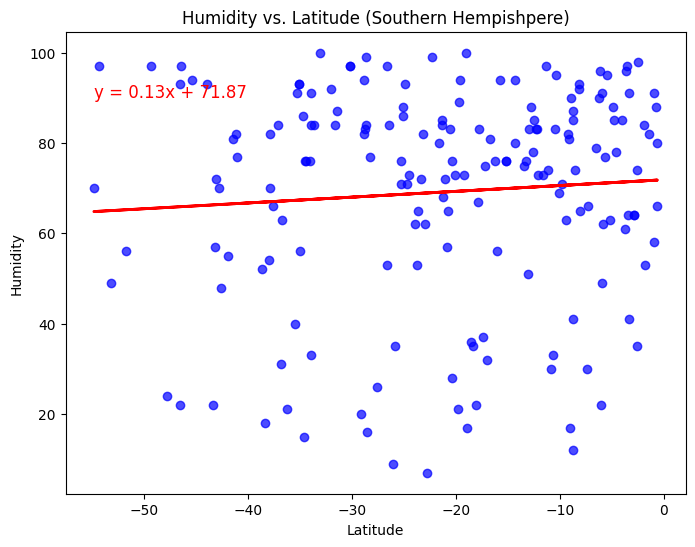

The r-value is: 0.07437979738880854


In [28]:
# Southern Hemisphere
# Assuming you have a DataFrame named city_data_df with columns "Lat" and "Humidity"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (Southern Hempishpere)")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The linear relationship between humidity and latitude in both hemispheres is generally weaker compared to the temperature-latitude relationship. This is because humidity is influenced by a wide range of local and regional factors beyond latitude alone. The scattered distribution of data points in the linear regression plots and r-values close to zero or slightly positive/negative indicate the relatively weak linear correlation. Additional factors and local influences are need to be considered to better understand the humidity patterns.

### Cloudiness vs. Latitude Linear Regression Plot

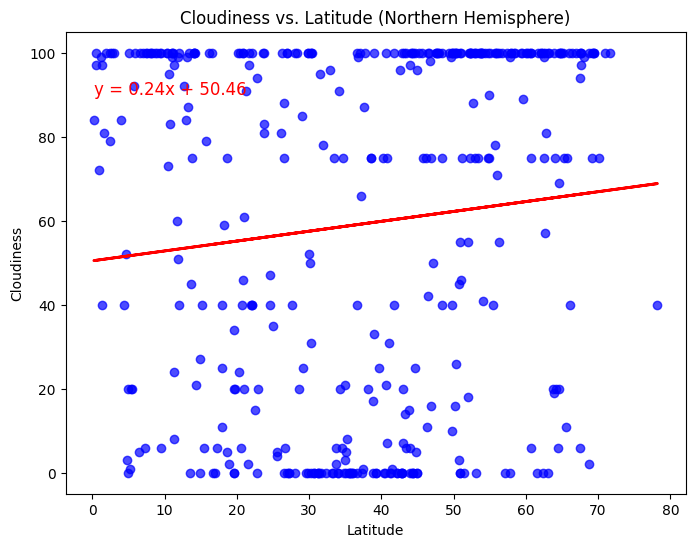

The r-value is: 0.10874913858767947


In [29]:
# Northern Hemisphere
# Extract the data for cloudiness and latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (Northern Hemisphere)")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

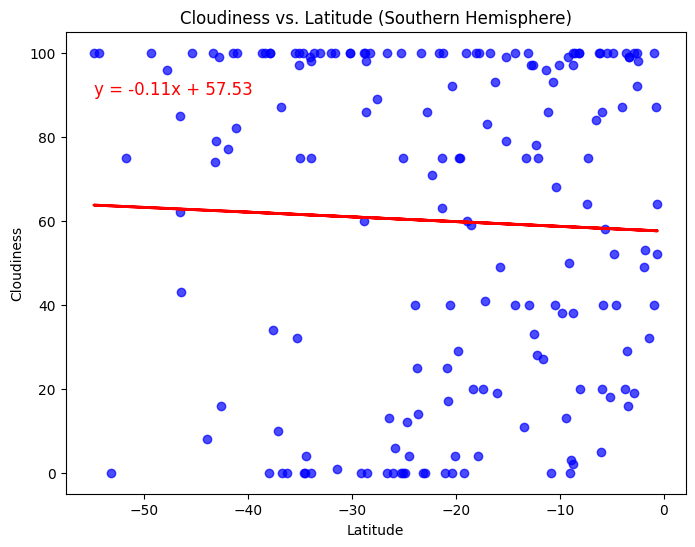

The r-value is: -0.04039396412148466


In [30]:
# Southern Hemisphere
#  Extract the data for cloudiness and latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (Southern Hemisphere)")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The linear relationship between cloudiness and latitude in both hemispheres is generally weaker compared to some other climate-related variables like temperature. This is because cloudiness is influenced by a wide range of local and regional factors, and it can vary significantly within relatively small geographic areas. The scattered distribution of data points in the linear regression plots and r-values close to zero or slightly positive/negative indicate the relatively weak linear correlation. To better understand cloudiness patterns, additional factors, including local weather systems and topography, need to be considered.

### Wind Speed vs. Latitude Linear Regression Plot

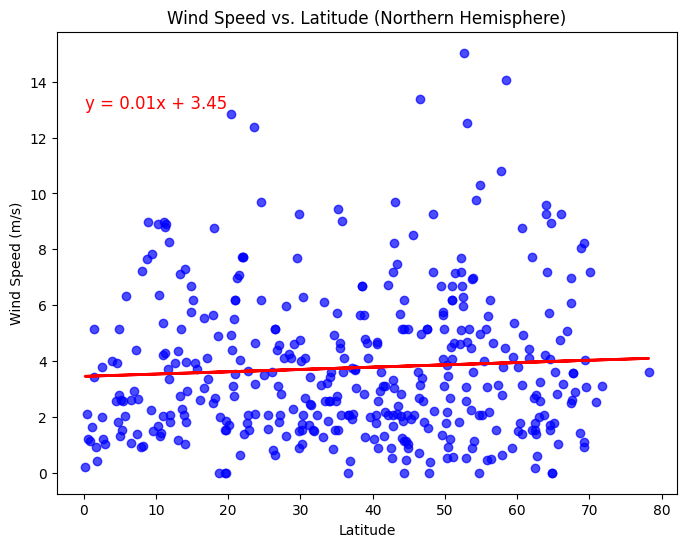

The r-value is: 0.0599200773025098


In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 2), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude (Northern Hemisphere)")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

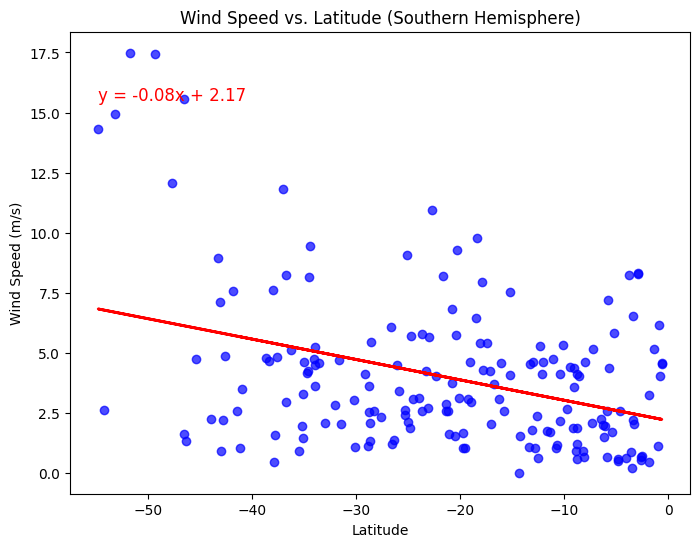

The r-value is: -0.36794669917785044


In [32]:
# Southern Hemisphere

# Extract the data for wind speed and latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=x_values, y=y_values, color='blue', alpha=0.7)

# Plot the regression line
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (min(x_values), max(y_values) - 2), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude (Southern Hemisphere)")

# Show the plot
plt.show()

# Display the r-value
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The linear relationship between wind speed and latitude in both hemispheres is generally weaker compared to other climatic variables. Wind speed is influenced by a complex interplay of local, regional, and global factors, making it highly variable. The scattered distribution of data points in the linear regression plots and r-values close to zero or slightly positive/negative indicate the relatively weak linear correlation. 